# ***Electric Vehicle Population***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
import numpy as np

# ***Dataset***

In [ ]:
df= pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014.0,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87.0,0.0,14.0,1593721.0,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017.0,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,2.0,257167501.0,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023.0,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20.0,0.0,11.0,224071816.0,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023.0,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,21.0,260084653.0,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,33.0,253771913.0,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17433,1C4JJXP64P,King,Tukwila,WA,98188.0,2023.0,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,11.0,238026953.0,POINT (-122.29179 47.43473),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
17434,7SAYGDEE6P,King,Redmond,WA,98052.0,2023.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,45.0,252596186.0,POINT (-122.12302 47.67668),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
17435,JTMABABA0P,King,Tukwila,WA,98188.0,2023.0,SUBARU,SOLTERRA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,11.0,251124058.0,POINT (-122.29179 47.43473),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
17436,5YJYGDEE2M,Kitsap,Bainbridge Island,WA,98110.0,2021.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,23.0,183459034.0,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17438 entries, 0 to 17437
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         17438 non-null  object 
 1   County                                             17435 non-null  object 
 2   City                                               17435 non-null  object 
 3   State                                              17437 non-null  object 
 4   Postal Code                                        17435 non-null  float64
 5   Model Year                                         17437 non-null  float64
 6   Make                                               17437 non-null  object 
 7   Model                                              17437 non-null  object 
 8   Electric Vehicle Type                              17437 non-null  object 
 9   Clean 

In [ ]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               3
City                                                 3
State                                                1
Postal Code                                          3
Model Year                                           1
Make                                                 1
Model                                                1
Electric Vehicle Type                                1
Clean Alternative Fuel Vehicle (CAFV) Eligibility    1
Electric Range                                       1
Base MSRP                                            1
Legislative District                                 3
DOL Vehicle ID                                       1
Vehicle Location                                     3
Electric Utility                                     3
2020 Census Tract                                    3
dtype: int64

In [ ]:
df.drop_duplicates()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014.0,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87.0,0.0,14.0,1593721.0,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017.0,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,2.0,257167501.0,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023.0,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20.0,0.0,11.0,224071816.0,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023.0,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,21.0,260084653.0,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,33.0,253771913.0,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17433,1C4JJXP64P,King,Tukwila,WA,98188.0,2023.0,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,11.0,238026953.0,POINT (-122.29179 47.43473),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
17434,7SAYGDEE6P,King,Redmond,WA,98052.0,2023.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,45.0,252596186.0,POINT (-122.12302 47.67668),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
17435,JTMABABA0P,King,Tukwila,WA,98188.0,2023.0,SUBARU,SOLTERRA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,11.0,251124058.0,POINT (-122.29179 47.43473),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
17436,5YJYGDEE2M,Kitsap,Bainbridge Island,WA,98110.0,2021.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,23.0,183459034.0,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10


# ***EDA***

In [ ]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               3
City                                                 3
State                                                1
Postal Code                                          3
Model Year                                           1
Make                                                 1
Model                                                1
Electric Vehicle Type                                1
Clean Alternative Fuel Vehicle (CAFV) Eligibility    1
Electric Range                                       1
Base MSRP                                            1
Legislative District                                 3
DOL Vehicle ID                                       1
Vehicle Location                                     3
Electric Utility                                     3
2020 Census Tract                                    3
dtype: int64

In [ ]:
df['Vehicle Location'].fillna('Vehicle Location',inplace=True)
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].fillna('Clean Alternative Fuel Vehicle (CAFV) Eligibility',inplace=True)
df['Electric Vehicle Type'].fillna('Electric Vehicle Type',inplace=True)
df['Make'].fillna('Make',inplace=True)
df['Model'].fillna('Model',inplace=True)
df['County'].fillna('County',inplace=True)
df['City'].fillna('City',inplace=True)

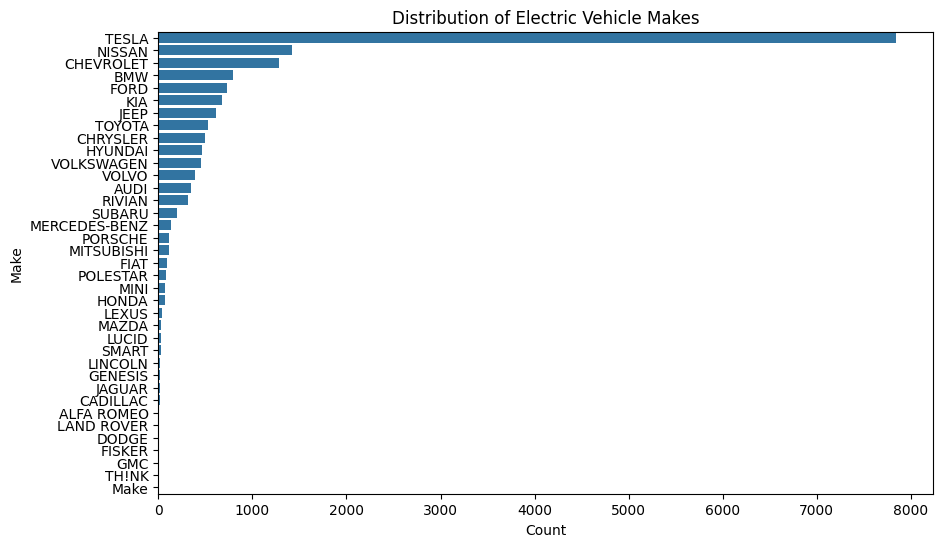

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Make', data=df, order=df['Make'].value_counts().index)
plt.title('Distribution of Electric Vehicle Makes')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

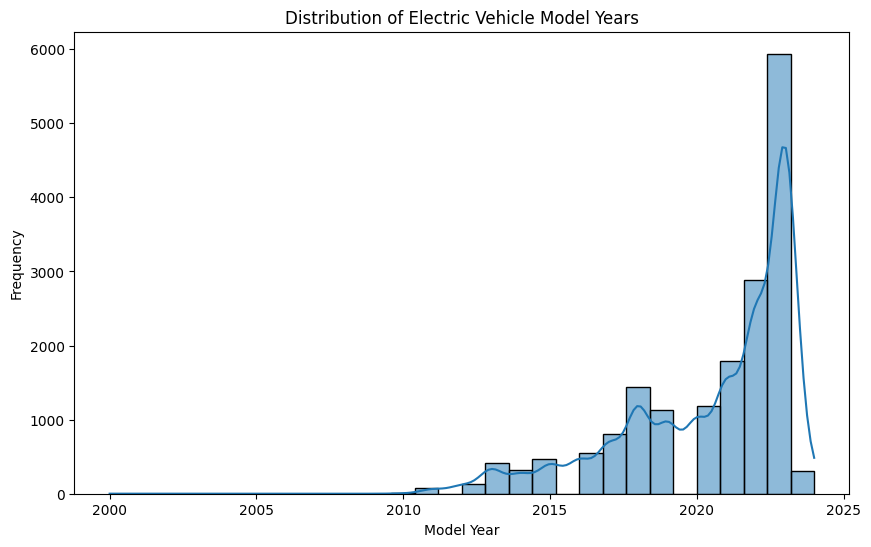

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Model Year'], bins=30, kde=True)
plt.title('Distribution of Electric Vehicle Model Years')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()


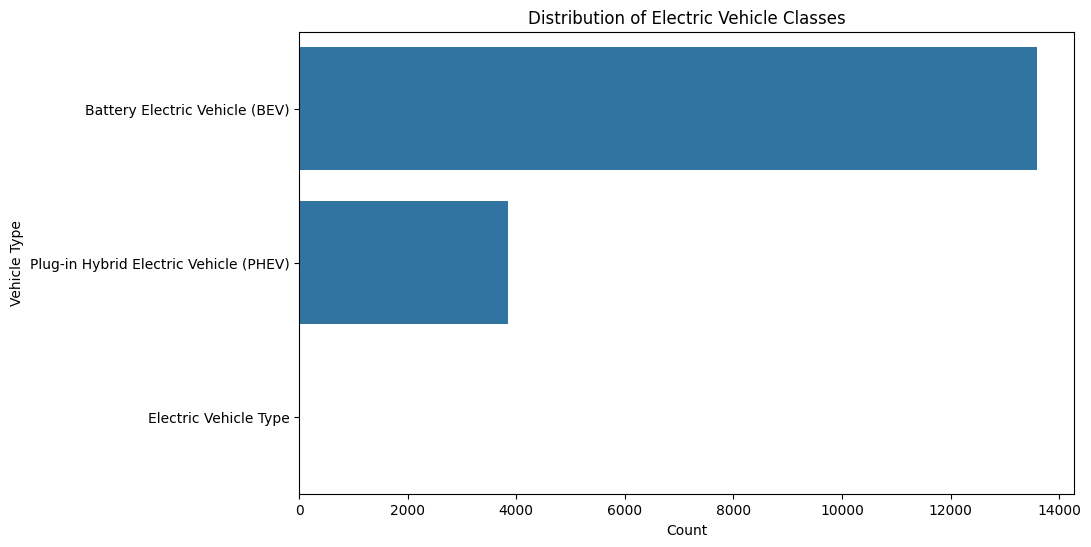

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Electric Vehicle Type', data=df, order=df['Electric Vehicle Type'].value_counts().index)
plt.title('Distribution of Electric Vehicle Classes')
plt.xlabel('Count')
plt.ylabel('Vehicle Type')
plt.show()


# ***Correlation Heatmap***

<ipython-input-12-807a6d74cae8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


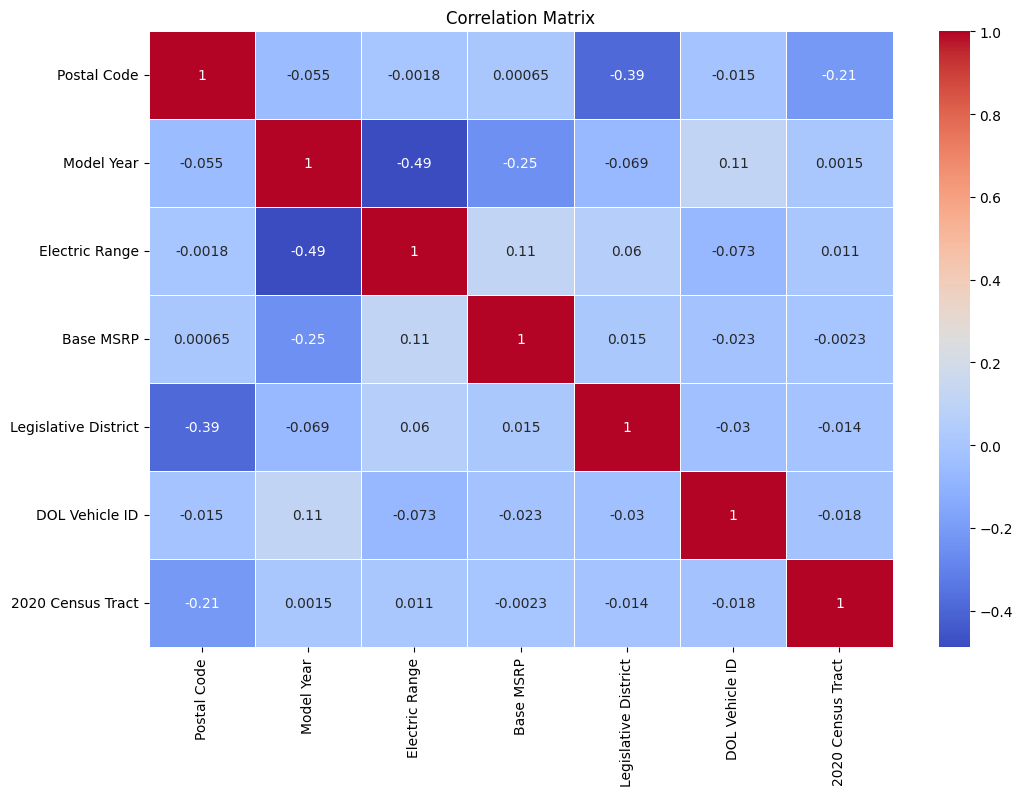

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# ***Modal***

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df:
  df[i]=encoder.fit_transform(df[i])

# ***Linear Regression***

In [ ]:
x=df.drop("Electric Range",axis=1)
y=df["Electric Range"]
scaler= StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)
mse=mean_squared_error(y_test,y_pred_lr)
r2=r2_score(y_test,y_pred_lr)
mae=mean_absolute_error(y_test,y_pred_lr)
print("mse:",mse)
print("r2:",r2)
print("mae:",mae)

mse: 337.91532090513147
r2: 0.6517652193042223
mae: 15.003720986374818


# ***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)
y_pred_dt=decision_tree.predict(x_test)
MSE=mean_squared_error(y_test,y_pred_dt)
r2_=r2_score(y_test,y_pred_dt)
MAE=mean_absolute_error(y_test,y_pred_dt)


print("mse:",MSE)
print("r2_score:",r2_)
print("mae:",MAE)

mse: 0.44466743119266056
r2_score: 0.9995417530493463
mae: 0.023222477064220183


# ***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
random_forest.fit(x_train,y_train)
y_pred_rf=random_forest.predict(x_test)
mean_sq_error=mean_squared_error(y_test,y_pred_rf)
r2score=r2_score(y_test,y_pred_rf)
mean_abs_error=mean_absolute_error(y_test,y_pred_rf)

print("mse:",mean_sq_error)
print("r2:",r2score)
print("mae:",mean_abs_error)

mse: 0.2140859518348624
r2: 0.9997793761635679
mae: 0.03815940366972476


# ***xgboost***

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

y_pred_xg=xgb.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xg)
r2_xgb=r2_score(y_test,y_pred_xg)
mae_xgb=mean_absolute_error(y_test,y_pred_xg)
print("mse:",mse_xgb)
print("r2:",r2_xgb)
print("mae:",mae_xgb)

mse: 0.1464142433645896
r2: 0.9998491144710686
mae: 0.10597407411558028


# ***catboost***

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=1000,
                                   learning_rate=0.1,
                                   depth=6,
                                   verbose=100)

catboost_model.fit(x_train, y_train)

y_pred_cb = catboost_model.predict(x_test)

mse_cb = mean_squared_error(y_test,y_pred_cb )
r2_cb=r2_score(y_test,y_pred_cb)
mae_cb=mean_absolute_error(y_test,y_pred_cb)
print("mse:",mse_cb)
print("r2:",r2_cb)
print("mae:",mae_cb)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.6 MB/s eta 0:00:00
0:	learn: 28.0218972	total: 49.9ms	remaining: 49.9s
100:	learn: 1.4848551	total: 429ms	remaining: 3.82s
200:	learn: 0.9363693	total: 802ms	remaining: 3.19s
300:	learn: 0.6477927	total: 1.22s	remaining: 2.82s
400:	learn: 0.5030418	total: 1.61s	remaining: 2.4s
500:	learn: 0.4040965	total: 2.02s	remaining: 2.01s
600:	learn: 0.3427293	total: 2.4s	remaining: 1.6s
700:	learn: 0.3033620	total: 2.81s	remaining: 1.2s
800:	learn: 0.2706394	total: 3.21s	remaining: 798ms
900:	learn: 0.2409163	total: 3.65s	remaining: 402ms
999:	learn: 0.2186704	total: 4.08s	remaining: 0us
mse: 0.1533059727476661
r2: 0.9998420122779396
mae: 0.14644459260001386


# ***SVR***

In [ ]:
from sklearn.svm import SVR
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

svr = SVR(kernel='linear', C=100)

svr.fit(x_train, y_train)

y_pred_svr = svr.predict(x_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr=r2_score(y_test,y_pred_svr)
mae_svr=mean_absolute_error(y_test,y_pred_svr)
print("mse:",mse_svr)
print("r2:",r2_svr)
print("mae:",mae_svr)

mse: 429.77650870589935
r2: 0.5570987197132348
mae: 12.889362513923986


In [ ]:
scores=['MSE','MAE','R2 SCORE']
name=['linear regression','decision tree','random forest','xg_boost','cat_boost',"svm"]
pred=[y_pred_lr,y_pred_dt,y_pred_rf,y_pred_xg,y_pred_cb,y_pred_svr]
mse=[]
mae=[]
r2=[]
for j in pred:
  mse.append(mean_squared_error(y_test,j))
  mae.append(mean_absolute_error(y_test,j))
  r2.append(r2_score(y_test,j))
eval_scores=pd.DataFrame(
    {'Models':name,
     'MSE':mse,
     'MAE':mae,
     'R2':r2}
)
eval_scores

,Models,MSE,MAE,R2
0,linear regression,337.915321,15.003721,0.651765
1,decision tree,0.444667,0.023222,0.999542
2,random forest,0.214086,0.038159,0.999779
3,xg_boost,0.146414,0.105974,0.999849
4,cat_boost,0.153306,0.146445,0.999842
5,svm,429.776509,12.889363,0.557099
